# Q1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [3]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [4]:
new_df = df.copy()
new_df.rename(columns={'연령대코드(5세단위)':'연령대'}, inplace=True)
new_df['연령대'] = new_df['연령대'].map(age_code)
new_df.head(5)
new_df.groupby(['연령대'])['허리둘레'].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


# Q2

<Axes: >

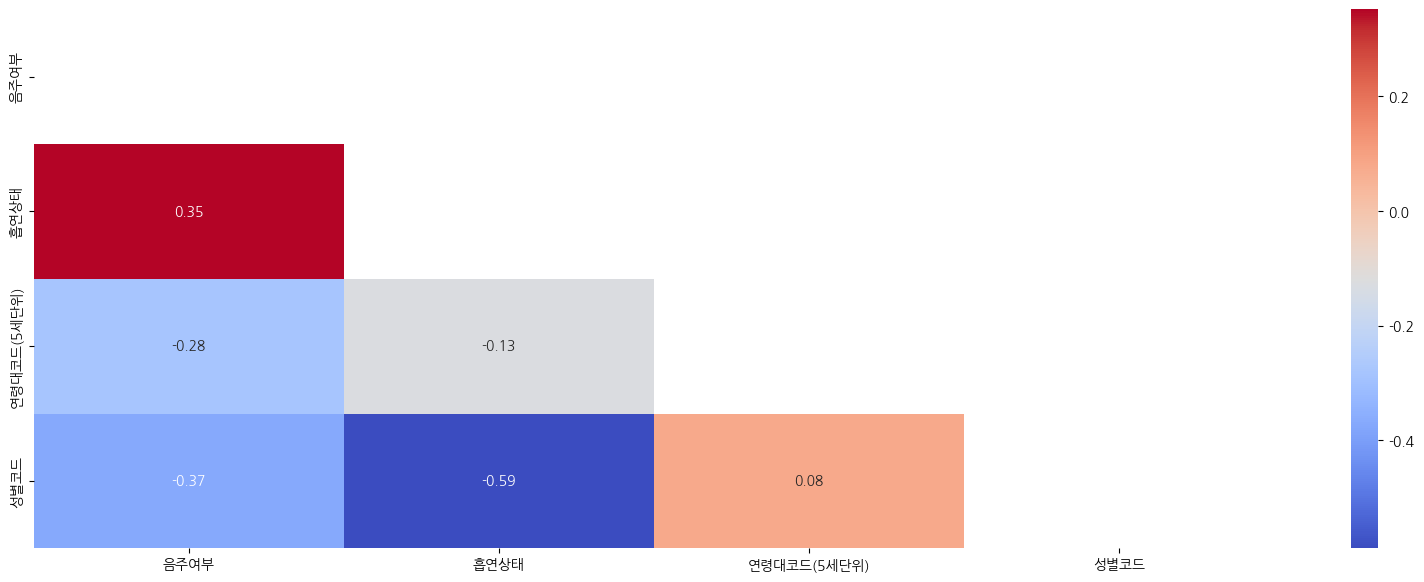

In [5]:
df_small = df[['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']]
df_corr = df_small.corr()

import matplotlib.pyplot as plt

mask = np.triu(np.ones_like(df_corr, dtype=np.bool_))
plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

# Q3

<Axes: xlabel='흡연상태', ylabel='count'>

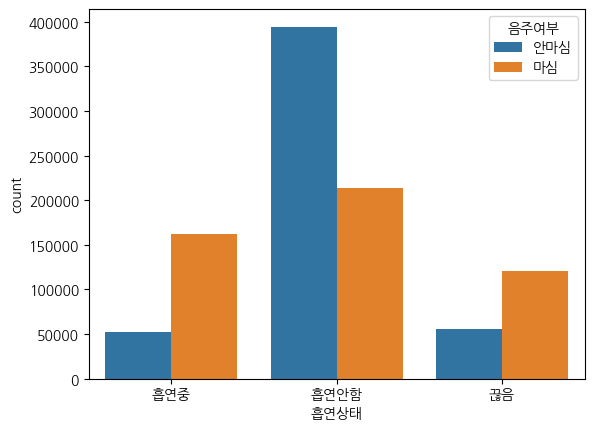

In [6]:
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}
sd_df = df.copy()
sd_df['흡연상태'] = sd_df['흡연상태'].map(smoke)
sd_df['음주여부'] = sd_df['음주여부'].map(drink)

sns.countplot(data=sd_df, x="흡연상태", hue="음주여부")


# Q4

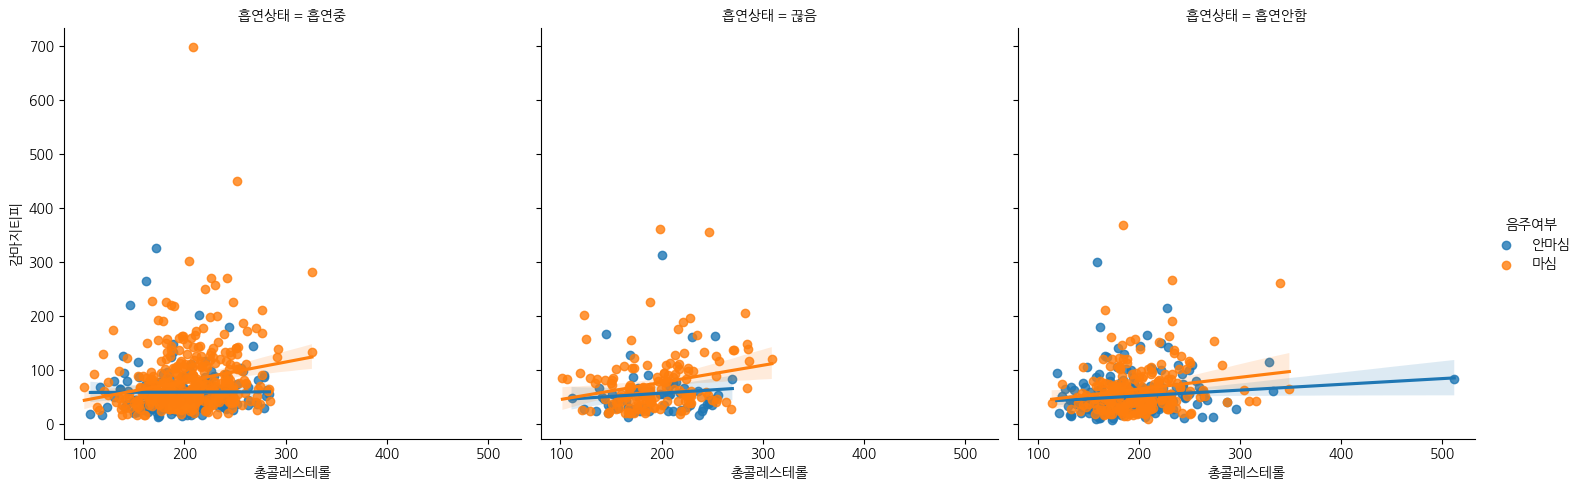

In [7]:
sd_df120 = sd_df[(sd_df["체중(5Kg 단위)"] >= 120)]
sns.lmplot(data=sd_df120, x="총콜레스테롤", y="감마지티피", hue="음주여부", col="흡연상태")

# Q5

<Axes: ylabel='연령대,성별코드'>

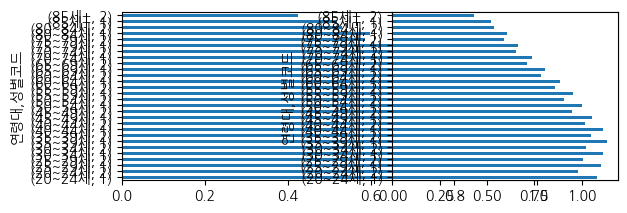

In [30]:
s_df = new_df[(new_df['시력(좌)'] < 9.9) & (new_df['시력(우)'] < 9.9)]
l_df = s_df.groupby(['연령대', '성별코드'])['시력(좌)'].mean()
r_df = s_df.groupby(['연령대', '성별코드'])['시력(우)'].mean()


plt.subplot(211)
l_df.plot.barh()

plt.subplot(222)
r_df.plot.barh()